# Assignment 2 - Supervised Machine Learning Fundamentals

## *Satvik Kishore*
Netid: sk741

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1.
The flexible model will perform *better* because the large number of data, coupled with lower dimensionality will make it difficult for the flexible model to overfit on the data, as errors on a larger set will not allow local overfitting to occur. The larger data will resemble the true population better, while the lesser amount of predictors will allow a greater density of datapoints within the predictor space. A less flexible model will not be able to mimic the data to the degree the flexible model is able to.  
2.
The flexible model is expected to perform *worse* than the inflexible model. There will be lower density of points and the flebile model is likelier to overfit and generalize poorly. The inflexible model will have the advantage of the constraining model assumptions allowing it to not fit the data too tightly.  
3.
The flexible model is expected to perform *better* as it will be easier for it to adapt to the nonlinear structure of the data. This answer assumes that the inflexible model's configuration does not assume knowledge of the nature of the non-linearity of the data. Eg: if the data is known to be distributed as a cubic function, an inflexible model constrained to a cubic relationship might perform better than a more non-paramteric flexible model.  
4.
The inflexible model is expected to perform *better* as it will not try too hard to fit the high variance data.

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**  
**(a)**  
(i) Regression, because salary is a continous variable  
(ii) Inference, beacuse we are interested in the factors that influence salary, not salary for previously unknown CEOs  
(iii) n = 500, p = 3. (If we one-hot encode "industry", p will be higher)  
**(b)**  
(i) Classification, because Success/Failure is a binary discrete variable  
(ii) Prediction, we want to predict the success/failure for a datapoint with an unkown outcome  
(iii) n = 20, p = 13  
**(c)**  
(i) Regression, because the % change is a continous variable  
(ii) Prediction, stated in the question  
(iii) n=52, p=3


# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [1]:
import numpy as np
import pandas as pd

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

dist = (X**2).sum(axis=1)
print("(a)")
pd_dist = pd.DataFrame({"squared distance to origin": dist, "y": y} )
pd_dist.index = range(1,7)
print(pd_dist)

(a)
   squared distance to origin  y
1                           9  r
2                           4  r
3                          10  r
4                           5  b
5                           2  b
6                           3  r


**ANSWER**:

in below answers, we use squared euclidean distances instead of euclidean distance, as it is easier to compute and represent without change in anwers as sqrt is a monotonic function  
(b)  
for K = 1, $\hat{y} =$ blue, because the closest point, pt 5 with squared distance = 2 has $y =$ blue  
(c)  
for K = 3, $\hat{y} =$ red, because of the three closest points (2, 5, and 6 with squared distances 4,2,3) have majority (2 out of 3) observations with $y=$ red  
(d)  
We would expect a large K to perform better. KNN can imitate non-linear boundaries, and smaller K can better form varying boundaries, however, given the very low amount of training data, it would be inadvisable to overfit the training data using a smaller K


## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

**ANSWER**:

**(a)**

In [2]:
# Skeleton code for part (a) to write your own kNN classifier
from scipy.stats import mode
import time
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        return None
    
    def fit(self, x, y):
                # Save the training data to properties of this class
        self.x_train = np.expand_dims(x, axis = 0)
        self.y_train = y
        return None
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for
        dist = np.square(self.x_train - np.expand_dims(x, axis=1)).sum(2) #calculate squared distances
        dist = dist.argsort(1) #argsort for each input
        dist = dist[:, 0:k] # only select k closest
        dist = self.y_train[dist] #replace with y values
        y_hat = mode(dist,1).mode[:,0] #get most common from each row
        # Return the estimated targets
        return list(y_hat)

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**(b)**

In [3]:
x_train_low = np.genfromtxt('data/A2_X_train_low.csv', delimiter=',')
y_train_low = np.genfromtxt('data/A2_y_train_low.csv', delimiter=',')
x_train_high = np.genfromtxt('data/A2_X_train_high.csv', delimiter=',')
y_train_high = np.genfromtxt('data/A2_y_train_high.csv', delimiter=',')

x_test_low = np.genfromtxt('data/A2_X_test_low.csv', delimiter=',')
y_test_low = np.genfromtxt('data/A2_y_test_low.csv', delimiter=',')
x_test_high = np.genfromtxt('data/A2_X_test_high.csv', delimiter=',')
y_test_high = np.genfromtxt('data/A2_y_test_high.csv', delimiter=',')

**(c)**

In [4]:
lowmodel = Knn()
lowmodel.fit(x_train_low, y_train_low)
low_time = time.time()
low_pred = lowmodel.predict(x_test_low, k=5)
low_time = time.time() - low_time
low_acc = accuracy(y_test_low, low_pred)
print(f"time for low model = {round(low_time,2)}")
print(f"accuracy for low model = {round(low_acc,2)}")

highmodel = Knn()
highmodel.fit(x_train_high, y_train_high)
high_time = time.time()
high_pred = highmodel.predict(x_test_high, k=5)
high_time = time.time() - high_time
high_acc = accuracy(y_test_high, high_pred)
print(f"time for high model = {round(high_time,2)}")
print(f"accuracy for high model = {round(high_acc,2)}")

time for low model = 0.12
accuracy for low model = 0.92
time for high model = 1.1
accuracy for high model = 0.99


**(d)**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
skmodel_low = KNeighborsClassifier(n_neighbors=5)
skmodel_low.fit(x_train_low, y_train_low)
low_time = time.time()
low_pred = skmodel_low.predict(x_test_low)
low_time = time.time() - low_time
low_acc = accuracy(y_test_low, low_pred)
print(f"time for low model = {round(low_time,2)}")
print(f"accuracy for low model = {round(low_acc,2)}")

skmodel_high = KNeighborsClassifier(n_neighbors=5)
skmodel_high.fit(x_train_high, y_train_high)
high_time = time.time()
high_pred2 = skmodel_high.predict(x_test_high)
high_time = time.time() - high_time
high_acc2 = accuracy(y_test_high, high_pred2)
print(f"time for high model = {round(high_time,2)}")
print(f"accuracy for high model = {round(high_acc2,2)}")

time for low model = 0.03
accuracy for low model = 0.92
time for high model = 0.25
accuracy for high model = 0.99


We observe that the scikit-learn model has the same accuracies as our model, indicating that our model implementation is correct. We also observe that sklearn models predict faster, indicating that our model can be better optimized.

**(e)**

Having prediction process being slow can be problematic when the models are deployed for usage. Models that take time to train have the luxury of being trained on better equipment, and this process needs to be done only once. But if a model is slow in predicting, it can be bad because the model might have to make predictions frequently, and could end up being deployed weaker machines (like mobile phones), making usage tedious. Slow inference can occur in KNN when data sizes are very large (both in terms of number observations and number of variables, for eg: 10 million observations, 50 variables). This large model can never be feasibily deployed in real time usage applications like edge devices where we need near-immediate inference.

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

**ANSWER**

**(a)**

In [6]:
from sklearn.datasets import make_moons
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
np.random.seed(1123)
x,y = make_moons(1000, noise=0.35)

**(b)**

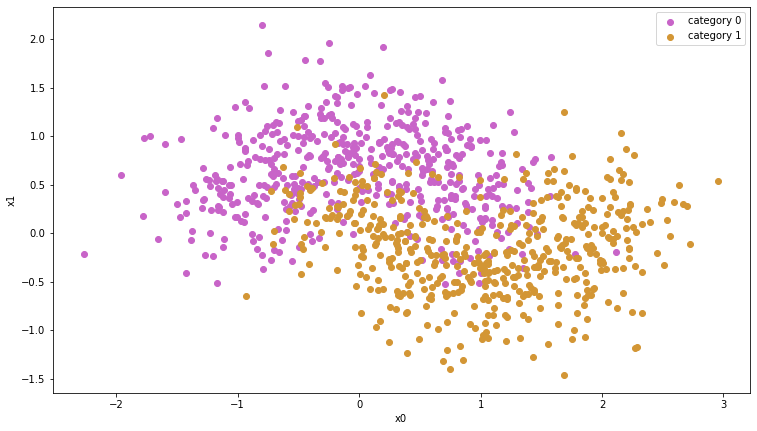

In [7]:
newcmp = LinearSegmentedColormap.from_list("new", [(200/255, 100/255, 200/255), (211/255, 150/255, 53/255)], N=2)

fig, ax = plt.subplots(1)
fig.set_size_inches(12.5, 10.5*12.5/18.5)
for category in [0,1]:
    ax.scatter(x=x[y==category, 0],
               y=x[y==category, 1],
               color=newcmp(category),
               label = "category "+ str(category))
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend()
#fig.show()
None

**(c)**

In [8]:
np.random.seed(1223)
smol_xs = []
smol_ys = []
models = [[],[],[]]
for i in range(3):
    idx = np.random.randint(1000, size=100)
    smol_xs.append(x[idx,:])
    smol_ys.append(y[idx])
    for j,k in enumerate([1,25,50]):
        models[i].append(KNeighborsClassifier(n_neighbors=k))
        models[i][j].fit(smol_xs[i], smol_ys[i])

    

**(d)**

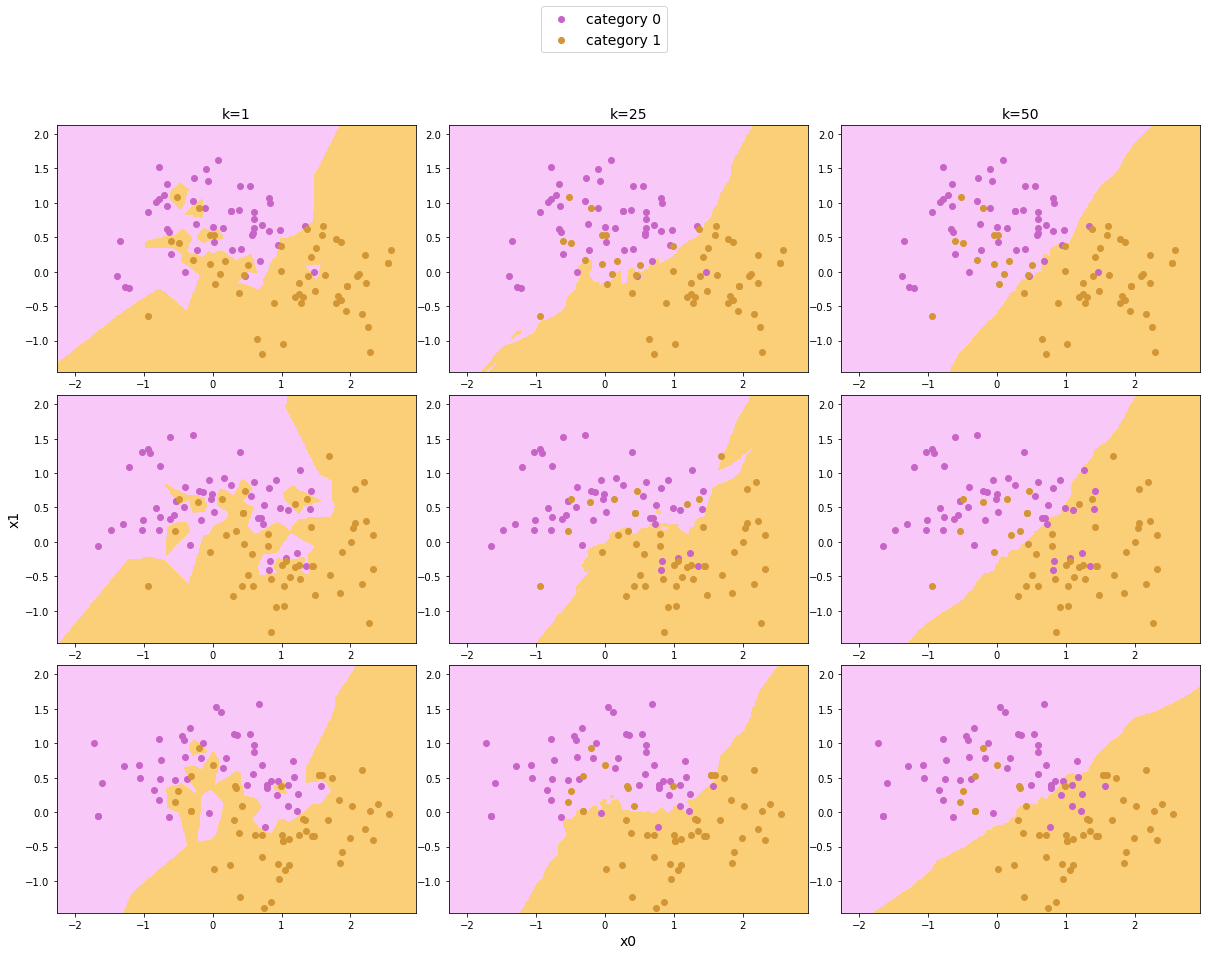

In [9]:
palecmp = LinearSegmentedColormap.from_list("new", [(248/255, 200/255, 248/255), (251/255, 206/255, 120/255)], N=2)
fig, ax = plt.subplots(3,3)
fig.set_size_inches(20.5, 14.5)
fig.subplots_adjust(wspace=0.09, hspace=0.09)
fs = 14

h=0.02
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))

for i in range(3):
    for j in range(3):
        decision = models[i][j].predict(np.c_[xx.ravel(), yy.ravel()])
        decision = decision.reshape(xx.shape)
        ax[i,j].contourf(xx, yy, decision, cmap=palecmp)
        for category in [0,1]:
            ax[i,j].scatter(x=smol_xs[i][smol_ys[i]==category, 0],
                            y=smol_xs[i][smol_ys[i]==category, 1],
                            color=newcmp(category),
                            label = "category "+ str(category))

ax[0,0].set_title("k=1", fontsize=fs)
ax[0,1].set_title("k=25", fontsize=fs)
ax[0,2].set_title("k=50", fontsize=fs)
ax[2,1].set_xlabel('x0', fontsize=fs)
ax[1,0].set_ylabel('x1', fontsize=fs)
handles, labels = ax[2,2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize=fs)
None


**(e)**  
We observe that the boundaries for k=1 vary the most having a sharp changing boundary that differs greatly across the data it was trained on. On the other hand, k=50 has a mostly consistent boundary with a smooth boundary. k=1 fits the data too tightly, incorporating all the noisy observations, k=50 fits a straight line that does not fit well with the non linearity of the data. k=50 is the best, with fairly consistent boundaries that are non linear enough to capture data distribution.

**(f)**

The above plots do a good job of illustrating the bias variance trade off. here, We can see k=1 having high variance, being inconsistent across the datasets but with low bias to fit the data  perfectly. For k=50, we have low variance with consistent decisiont boundaries across datasets but with high bias, unable to fit the proper distribution of the data. k=25 has a tradeoff of both, with medium bias and medium variance, i.e. captures much of the distribution and is fairly consistent across datasets.

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)**

In [10]:
np.random.seed(66)
x_test, y_test = make_moons(1000, noise=0.35)

**(b)**

In [11]:
train_errors = []
test_errors = []
for k in range(1,501):
    kmodel = KNeighborsClassifier(n_neighbors=k)
    kmodel.fit(x, y)
    train_pred = kmodel.predict(x)
    train_errors.append(1 - (y==train_pred).sum()/len(y))
    test_pred = kmodel.predict(x_test)
    test_errors.append(1 - (y_test==test_pred).sum()/len(y_test))
    pass

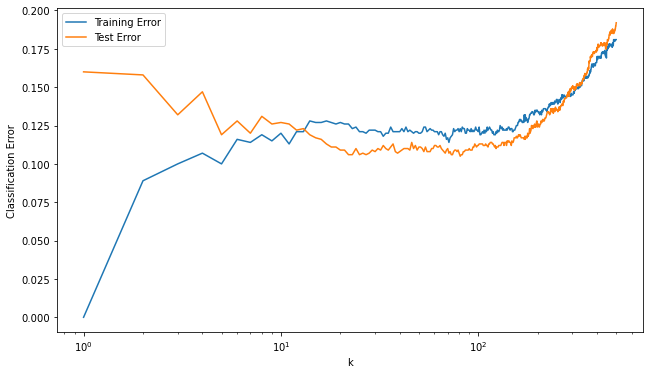

In [12]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10.5, 10.5*10.5/18.5)
ax.plot(range(1,501), train_errors, label="Training Error")
ax.plot(range(1,501), test_errors, label="Test Error")
ax.set_xlabel("k")
ax.set_ylabel("Classification Error")
ax.set_xscale('log')
ax.legend()
None
    

**(c)**

The training error tends to increase as k increases. The test error first dips, plateaus then increases as k increases

**(d)**

low k represents high variance, high k represents high bias

**(e)**

The optimal value of k can be somewhere between 10 and 100, where the test error is lowest representing maximum generalizability to unseen data. k with minimum test error was found to be 45.

**(f)**

In other models, flexibility can be controlled by choice and number of parameters. For linear regression, adding more transformations of variables through polynomial/non linear effects as additional linear features is a method to increase flexibility. In Neural Networks, number of neurons/depth of network can increase flexibility.

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

In [13]:
import numpy as np
import pandas as pd

path = './data/'
train = pd.read_csv(path + 'A2_Q7_train.csv')
test = pd.read_csv(path + 'A2_Q7_test.csv')

x_train = train.x.values
y_train = train.y.values
x_train = x_train.reshape(-1,1)

x_test = test.x.values
y_test = test.y.values
x_test = x_test.reshape(-1,1)

**ANSWER**

**(a)**

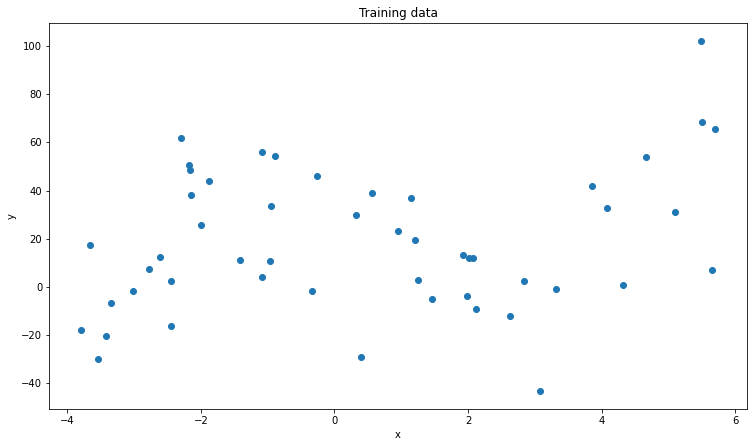

In [14]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12.5, 10.5*12.5/18.5)
ax.scatter(x=x_train[:,0], y=y_train)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Training data")
#fig.show()
None

**(b)**

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(x_train, y_train)
r2 = lm.score(x_train, y_train)
pred = lm.predict(x_train)
mse = np.square(pred-y_train).mean()

In [16]:
print("The R^2 was found to be " + str(round(r2,2)))
print("The MSE was found to be " + str(round(mse,2)))
print("The equation as was found to be y_hat = " +
      str(round(lm.intercept_,2)) + " + " + str(np.round(lm.coef_.squeeze(0),2)) +"x")

The R^2 was found to be 0.06
The MSE was found to be 791.42
The equation as was found to be y_hat = 17.2 + 2.59x


**(c)**

In [17]:
z_train = np.concatenate([x_train,x_train**2,x_train**3],1)
lm3 = LinearRegression(fit_intercept=True)
lm3.fit(z_train, y_train)
r2 = lm3.score(z_train, y_train)
pred = lm3.predict(z_train)
mse = np.square(pred-y_train).mean()

In [18]:
print("The R^2 was found to be " + str(round(r2,2)))
print("The MSE was found to be " + str(round(mse,2)))
print("The equation as was found to be y_hat = " +
      str(round(lm3.intercept_,2)) + " + " +
      str(np.round(lm3.coef_[0],2)) +"x " + 
      str(np.round(lm3.coef_[1],2)) +"x^2 " + 
      str(np.round(lm3.coef_[2],2)) +"x^3 " )

The R^2 was found to be 0.4
The MSE was found to be 510.88
The equation as was found to be y_hat = 24.16 + -9.25x -2.13x^2 0.9x^3 


**(d)**

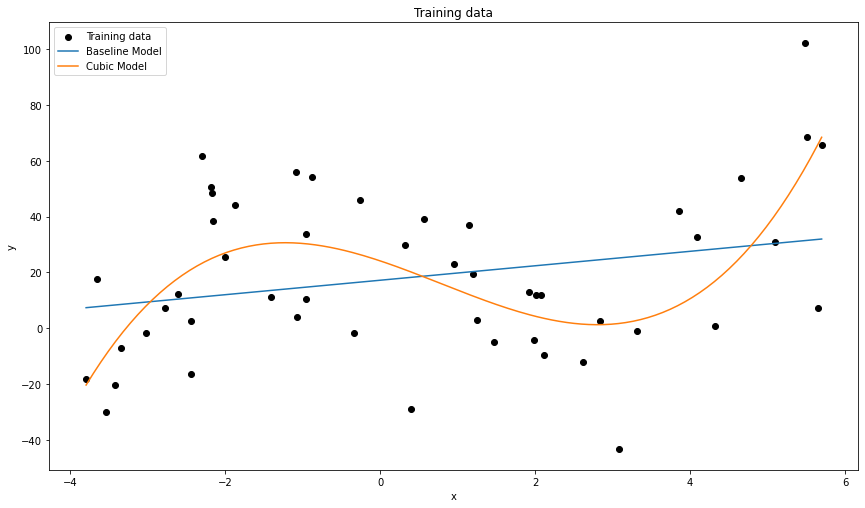

In [19]:
predpoints = np.linspace(min(x_train), max(x_train), 200)
base_pred = lm.predict(predpoints.reshape(-1,1))
cubepredpoints = np.concatenate([predpoints,predpoints**2,predpoints**3],1)
cube_pred = lm3.predict(cubepredpoints)

fig, ax = plt.subplots(1)
fig.set_size_inches(14.5, 10.5*14.5/18.5)
ax.scatter(x=x_train[:,0], y=y_train, label="Training data", color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Training data")
ax.plot(predpoints, base_pred, label="Baseline Model")
ax.plot(predpoints, cube_pred, label="Cubic Model")
ax.legend()
#fig.show()
None

**(e)**

In [20]:
r2 = lm.score(x_test, y_test)
pred = lm.predict(x_test)
mse = np.square(pred-y_test).mean()

print("The Test R^2 for the baseline model was found to be " + str(round(r2,2)))
print("The Test MSE for the baseline model  was found to be " + str(round(mse,2)))


z_test = np.concatenate([x_test,x_test**2,x_test**3],1)
r2 = lm3.score(z_test, y_test)
pred = lm3.predict(z_test)
mse = np.square(pred-y_test).mean()

print("The Test R^2 for the cubic model was found to be " + str(round(r2,2)))
print("The Test MSE for the cubic model  was found to be " + str(round(mse,2)))

The Test R^2 for the baseline model was found to be -0.13
The Test MSE for the baseline model  was found to be 1116.66
The Test R^2 for the cubic model was found to be 0.23
The Test MSE for the cubic model  was found to be 759.5


**(f)**  
The cubic model shows a better performance on both the test and train data. It can better model the distribution of the train data while still being flexible enough. The baseline model is too inflexible and performs extremely poorly on the test data.

**(g)**  
If the test data were too different from the train data, our model would perform terribly as the data it has learned on does not represent the test data in any way. Generalization would be very bad as well. Model training assumes that future (or test) data is from the same data generation process as the train data, and violating this will cause models to worsen.